Exploratory Data Analysis (EDA) of traffic fines in Madrid during the period of January 2022 - October 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 -> Join all the dataframes from January to October in a single dataframe.

In [2]:
filenames = ['202201_detalle.csv', '202202_detalle.csv', '202203_detalle.csv', '202204_detalle.csv', '202205_detalle.csv', '202206_detalle.csv', '202207_detalle.csv', '202208_detalle.csv', '202209_detalle.csv', '202210_detalle.csv']

dataframes = []

for filename in filenames:

    df = pd.read_csv(filename, header=0, encoding = "ISO-8859-1", sep = ";", names=['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA', 'COORDENADA-X', 'COORDENADA-Y'])
    
    dataframes.append(df)

multas = pd.concat(dataframes, axis=0, ignore_index=True)


In [3]:
multas.shape

(2267880, 14)

In [4]:
multas

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,LEVE,CL ALONSO CANO 95,1,2022,17.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",,,,NaN
1,LEVE,CL CRISTOBAL BORDIU 10,1,2022,18.00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,NaN
2,GRAVE,CL ALENZA 28,1,2022,18.46,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,,,,NaN
3,LEVE,CL ALONSO CANO 20,1,2022,19.59,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",,,,NaN
4,LEVE,CL ALONSO CANO 84,1,2022,20.04,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA. ...,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,2022,13.45,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,,,,
2267876,GRAVE,CUESTA SAN VICENTE,10,2022,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,,
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,2022,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,,,,
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,2022,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANIS...,,,,


# 2 -> We are not going to work with geographic data, delete the XCOORD and Y_COORD columns.

In [5]:
multas.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA-X', 'COORDENADA-Y'],
      dtype='object')

In [6]:
multas = multas.drop(['COORDENADA-X', 'COORDENADA-Y'], axis = 1)

In [7]:
multas

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,LEVE,CL ALONSO CANO 95,1,2022,17.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",,
1,LEVE,CL CRISTOBAL BORDIU 10,1,2022,18.00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
2,GRAVE,CL ALENZA 28,1,2022,18.46,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,,
3,LEVE,CL ALONSO CANO 20,1,2022,19.59,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",,
4,LEVE,CL ALONSO CANO 84,1,2022,20.04,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA. ...,,
...,...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,2022,13.45,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,,
2267876,GRAVE,CUESTA SAN VICENTE,10,2022,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,2022,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,,
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,2022,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANIS...,,


In [8]:
multas.shape

(2267880, 12)

# 3 -> Check the unique values of the variables, there are some that do not have more than one value, so they are constants. Is it worth having them in the dataframe?

In [9]:
for column in multas:
    print(multas[column].unique())

['LEVE         ' 'GRAVE        ' 'MUY GRAVE    ' 'GRAVE     ' 'LEVE      '
 'MUY GRAVE ']
['CL ALONSO CANO 95              ' 'CL CRISTOBAL BORDIU 10         '
 'CL ALENZA 28                   ' ...
 'AV MIGUEL DELIBES-M.M.CANTINFL          '
 'CUESTA SAN VICENTE                      '
 'RAMON Y CAJAL 54                        ']
[ 1  2  3  4  5  6  7  8  9 10]
[2022]
[17.51 18.   18.46 ...  4.06  4.41  4.38]
[  90.  200.   60.   30.  500.  300. 1000.  100.  400.   50.]
['SI        ' 'SI' 'NO']
[0 4 3 6 2]
['SER                  ' 'AGENTES DE MOVILIDAD ' 'POLICIA MUNICIPAL    '
 'SACE                 ' 'AGENTES DE MOVILIDAD' 'POLICIA MUNICIPAL   '
 'SER                 ' 'SACE                ']
['ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï¿½N, EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIï¿½N HORARIA.     '
 'ESTACIONAR EN LUGAR PROHIBIDO.                                                                                           '
 'ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½

In [10]:
# we see that there are spaces in the values of some rows and not in others, causing duplicates in the unique values.
# delete them with the applymap, lambda and strip

multas = multas.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
for column in multas:
    print(multas[column].unique())

['LEVE' 'GRAVE' 'MUY GRAVE']
['CL ALONSO CANO 95' 'CL CRISTOBAL BORDIU 10' 'CL ALENZA 28' ...
 'AV MIGUEL DELIBES-M.M.CANTINFL' 'CUESTA SAN VICENTE' 'RAMON Y CAJAL 54']
[ 1  2  3  4  5  6  7  8  9 10]
[2022]
[17.51 18.   18.46 ...  4.06  4.41  4.38]
[  90.  200.   60.   30.  500.  300. 1000.  100.  400.   50.]
['SI' 'NO']
[0 4 3 6 2]
['SER' 'AGENTES DE MOVILIDAD' 'POLICIA MUNICIPAL' 'SACE']
['ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï¿½N, EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIï¿½N HORARIA.'
 'ESTACIONAR EN LUGAR PROHIBIDO.'
 'ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE UN VADO SEï¿½ALIZADO CORRECTAMENTE.'
 ...
 'CONDUCCION NEGLIGENTE: CAMBIOS SIN SEÑALIZAR CARRIL INSULTAR GESTOS OBSCENOS'
 'CONDUCCION TEMERARIA: CIRCULA PEGADO AL VEHICULO ANTERIOR SIN DISTANCIA SGDAD'
 'CONDUCCION TEMERARIA: CONDUCE POR LA ACERA MAS DE 200 METROS']
['' '90' '70' '50' '60' '40' '80' '30' '20']
['' '123' '160' '138' '75' '77' '80' '104' '76' '87' '85' '74' '78' '84'
 '79' '95' '94

We see that the "YEAR" variable only has one value and since we know that our EDA is of the year 2022, we can remove it from the DataFrame. Thus, we simplify the dataframe and we are removing a statistically insignificant variable from the data.

In [12]:
multas = multas.drop(['ANIO'], axis=1)

In [13]:
multas

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,LEVE,CL ALONSO CANO 95,1,17.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",,
1,LEVE,CL CRISTOBAL BORDIU 10,1,18.00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO.,,
2,GRAVE,CL ALENZA 28,1,18.46,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,,
3,LEVE,CL ALONSO CANO 20,1,19.59,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",,
4,LEVE,CL ALONSO CANO 84,1,20.04,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA.,,
...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,13.45,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,,
2267876,GRAVE,CUESTA SAN VICENTE,10,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,,
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,,
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,,


# 4 -> It seems that the columns VEL_LIMITE and VEL_CIRCULA have empty values, this is because, if the infraction was not caused by exceeding any speed limit, this value appears empty, change all the detected anomalies to null values (only in these two columns). Hint: Investigate how to regex a regular expression like r'^\s*$' in the replace function.

In [14]:
# Create a copy to keep the original
dfm = multas.copy()

In [15]:
# Replace empty cells with Numpy NaN (Not a Number)

dfm[['VEL_LIMITE', 'VEL_CIRCULA']] = dfm[['VEL_LIMITE', 'VEL_CIRCULA']].replace(r'^\s*$', np.nan, regex=True)

dfm

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,LEVE,CL ALONSO CANO 95,1,17.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",NaN,NaN
1,LEVE,CL CRISTOBAL BORDIU 10,1,18.00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO.,NaN,NaN
2,GRAVE,CL ALENZA 28,1,18.46,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,NaN,NaN
3,LEVE,CL ALONSO CANO 20,1,19.59,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",NaN,NaN
4,LEVE,CL ALONSO CANO 84,1,20.04,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,13.45,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,NaN,NaN
2267876,GRAVE,CUESTA SAN VICENTE,10,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,NaN,NaN
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,NaN,NaN
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,NaN,NaN


# 5 -> The columns VEL_LIMITE and VEL_CIRCULA, despite being two purely numeric columns, are recognized as "object" type:
5.1 Change the nulls of the two variables to zeros.
5.2 Change the type of the variable to numeric.
5.3 What is the most repeated non-zero value in VEL_LIMITE (speed limit of the road on which the fine occured)?

In [16]:
#5.1 -> change the nulls of the 2 NaN columns to 0

dfm[['VEL_LIMITE', 'VEL_CIRCULA']] = dfm[['VEL_LIMITE', 'VEL_CIRCULA']].replace(np.nan, 0, regex=True)

dfm

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,LEVE,CL ALONSO CANO 95,1,17.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0,0
1,LEVE,CL CRISTOBAL BORDIU 10,1,18.00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO.,0,0
2,GRAVE,CL ALENZA 28,1,18.46,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,0,0
3,LEVE,CL ALONSO CANO 20,1,19.59,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0,0
4,LEVE,CL ALONSO CANO 84,1,20.04,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA.,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,13.45,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,0,0
2267876,GRAVE,CUESTA SAN VICENTE,10,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,0,0
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,0,0
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,0,0


In [17]:
# 5.2 -> 'object' to 'float'

dfm[['VEL_LIMITE', 'VEL_CIRCULA']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267880 entries, 0 to 2267879
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   VEL_LIMITE   object
 1   VEL_CIRCULA  object
dtypes: object(2)
memory usage: 34.6+ MB


In [18]:
dfm[['VEL_LIMITE', 'VEL_CIRCULA']] = dfm[['VEL_LIMITE', 'VEL_CIRCULA']].astype(float) 

dfm.dtypes

CALIFICACION     object
LUGAR            object
MES               int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS            int64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE      float64
VEL_CIRCULA     float64
dtype: object

Let us get a more visual representation of the non-zero values 

In [19]:
# 5.3 in two ways
# 5.3(a)

import statistics as st

v = [vel for vel in dfm['VEL_LIMITE'] if vel != 0]

st.mode(v)

70.0

In [20]:
# 5.3(b)
# we filter for values other than 0 and put them in a new dataframe

f_df = dfm[dfm['VEL_LIMITE'] != 0]

f_df

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
32153,GRAVE,PO SANTA MARIA CABEZA 115,1,4.02,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD Mï¿½XIMA EN Vï¿½AS LIM...,90.0,123.0
32154,GRAVE,"M 30 KM 6,700 C 1",1,6.36,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD Mï¿½XIMA EN Vï¿½AS LIM...,90.0,160.0
32155,GRAVE,"M 30 KM 10,300 CR 1",1,2.06,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD Mï¿½XIMA EN Vï¿½AS LIM...,70.0,138.0
137652,GRAVE,"M-30 XC K 10,300 CR3",1,0.29,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD Mï¿½XIMA EN Vï¿½AS LIM...,70.0,75.0
137653,GRAVE,"M-30 XC K 10,300 CR3",1,0.56,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD Mï¿½XIMA EN Vï¿½AS LIM...,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...
2267860,GRAVE,"KM M ,7 PO EXTREMADURA",10,8.43,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70.0,79.0
2267861,GRAVE,"KM M ,7 PO EXTREMADURA",10,8.59,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70.0,83.0
2267862,GRAVE,"KM M ,7 PO EXTREMADURA",10,9.01,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70.0,77.0
2267863,GRAVE,"KM M ,7 PO EXTREMADURA",10,9.04,100.0,SI,0,AGENTES DE MOVILIDAD,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70.0,76.0


In [21]:
def get_mode(col):
    mode = f_df[col].mode()
    print(mode)

In [22]:
get_mode('VEL_LIMITE') # 70km/h is the most frequent speed limit value that is not 0

0    70.0
Name: VEL_LIMITE, dtype: float64


# 6 -> Generate a new column called DIFFERENCE_KMH that is the result of subtracting each value of the speed at which the driver was driving the speed limit at which the violation occurs, obtain a top 10 of drivers who exceeded the limits at a higher speed and a top 5 at a lower speed.

In [23]:
# We will use Numpy Arrays for efficiency in mathematical computation

dfm['DIFERENCIA_KMH'] = np.array(dfm['VEL_CIRCULA']) - np.array(dfm['VEL_LIMITE'])

dfm

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
0,LEVE,CL ALONSO CANO 95,1,17.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0.0,0.0,0.0
1,LEVE,CL CRISTOBAL BORDIU 10,1,18.00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO.,0.0,0.0,0.0
2,GRAVE,CL ALENZA 28,1,18.46,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,0.0,0.0,0.0
3,LEVE,CL ALONSO CANO 20,1,19.59,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0.0,0.0,0.0
4,LEVE,CL ALONSO CANO 84,1,20.04,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA.,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,13.45,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,0.0,0.0,0.0
2267876,GRAVE,CUESTA SAN VICENTE,10,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,0.0,0.0,0.0
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,0.0,0.0,0.0
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,0.0,0.0,0.0


In [24]:
top_10 = dfm['DIFERENCIA_KMH'].nlargest(10)
bottom_5 = dfm.loc[dfm['DIFERENCIA_KMH'] != 0, 'DIFERENCIA_KMH'].nsmallest(5)

print(f"Top 10 of the 'DIFERENCIA_KMH' column at highest speed:\n {top_10}")
print(f"Bottom 5 of the 'DIFERENCIA_KMH' column at lowest speed:\n {bottom_5}")

Top 10 of the 'DIFERENCIA_KMH' column at highest speed:
 32154      70.0
202048     70.0
1508393    70.0
420236     69.0
1508392    69.0
1641887    69.0
1816031    69.0
32155      68.0
166684     68.0
726626     68.0
Name: DIFERENCIA_KMH, dtype: float64
Bottom 5 of the 'DIFERENCIA_KMH' column at lowest speed:
 921400    1.0
923550    1.0
923552    1.0
923553    1.0
923555    1.0
Name: DIFERENCIA_KMH, dtype: float64


# 7 -> Obtain a dataframe filtered by all the fines that led to the withdrawal of points. Group the dataframe filtered by the public agent issuing the complaint. Which of all the public agents has a higher average withdrawal of points?

In [25]:
puntos_df = dfm[dfm['PUNTOS'] > 0]

In [26]:
puntos_df

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
2462,GRAVE,AV MEDITERRANEO 32,1,15.33,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMï¿½FORO EN FASE ROJA.,0.0,0.0,0.0
2465,GRAVE,AV AMERICA - CARTAGENA,1,15.35,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMï¿½FORO EN FASE ROJA.,0.0,0.0,0.0
2468,GRAVE,FRANCISCO SILVELA 62,1,15.36,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMï¿½FORO EN FASE ROJA.,0.0,0.0,0.0
2470,GRAVE,CIUDAD BARCELONA - M. PELAYO,1,15.40,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMï¿½FORO EN FASE ROJA.,0.0,0.0,0.0
2481,GRAVE,VIA LUSITANA - PL ELIPTICA,1,15.43,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMï¿½FORO EN FASE ROJA.,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2267873,GRAVE,PASEO INFANTA ISABEL 13,10,1.08,200.0,SI,4,POLICIA MUNICIPAL,NO FACILITAR LA PREFERENCIA DE PASO A UN VEHÍC...,0.0,0.0,0.0
2267876,GRAVE,CUESTA SAN VICENTE,10,3.53,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,0.0,0.0,0.0
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,1.50,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,0.0,0.0,0.0
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,9.00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,0.0,0.0,0.0


In [27]:
puntos_df.groupby(['DENUNCIANTE'])['PUNTOS'].mean()

DENUNCIANTE
AGENTES DE MOVILIDAD    3.983213
POLICIA MUNICIPAL       3.517801
Name: PUNTOS, dtype: float64

In [28]:
# check if "SER" or "SACE" have removed any points

check = ["SER", "SACE"]

ser = puntos_df['DENUNCIANTE'].isin(check)

if any(ser):
    print(f'Al menos un valor de {check} existe en DENUNCIATE')
else:
    print(f'Ningun valor de {check} existe en DENUNCIANTE')


Ningun valor de ['SER', 'SACE'] existe en DENUNCIANTE


In [29]:
values = puntos_df['DENUNCIANTE'].unique()

print(values)

['AGENTES DE MOVILIDAD' 'POLICIA MUNICIPAL']


We see that only 'AGENTES DE MOVILIDAD' and 'POLICIA MUNICIPAL' have issued fine that led to the withdrawal of points (neither "SER" nor "SACE") and thus we verify the output of the average. (greatest average -> 'AGENTES DE MOVILIDAD' = 3.98)

# 8 -> Eliminate the decimal part from the hour column,  graphically show in which hours the most fines occur.

In [30]:
dfm['HORA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2267880 entries, 0 to 2267879
Series name: HORA
Non-Null Count    Dtype  
--------------    -----  
2267880 non-null  float64
dtypes: float64(1)
memory usage: 17.3 MB


In [31]:
dfm.loc[:, 'HORA'] = (dfm['HORA'].astype(int) * 100)

In [32]:
dfm

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
0,LEVE,CL ALONSO CANO 95,1,1700,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0.0,0.0,0.0
1,LEVE,CL CRISTOBAL BORDIU 10,1,1800,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO.,0.0,0.0,0.0
2,GRAVE,CL ALENZA 28,1,1800,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,0.0,0.0,0.0
3,LEVE,CL ALONSO CANO 20,1,1900,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0.0,0.0,0.0
4,LEVE,CL ALONSO CANO 84,1,2000,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA.,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,1300,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,0.0,0.0,0.0
2267876,GRAVE,CUESTA SAN VICENTE,10,300,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,0.0,0.0,0.0
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,100,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,0.0,0.0,0.0
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,900,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,0.0,0.0,0.0


In [33]:
from datetime import datetime

# convert int values to time strings
# But the midnight values are 0s and not 0000, using the DateTime library now will give an error
# so we must convert the values == 0 to 00:00 with instructions for the 0s inside the apply()

dfm['HORA'] = dfm['HORA'].apply(lambda x: '00:00' if x == 0 else datetime.strptime(str(x), '%H%M').strftime('%H:%M'))

In [34]:
freq = dfm['HORA'].value_counts()
print(freq)

10:00    225520
09:00    189991
13:00    189366
11:00    185663
12:00    171405
17:00    159120
14:00    150493
18:00    145131
16:00    140977
19:00    135718
20:00    133147
15:00    111057
08:00     61429
21:00     57789
22:00     47798
23:00     40493
00:00     34194
07:00     32154
06:00     24464
05:00     12212
03:00     10525
04:00      9234
Name: HORA, dtype: int64


In [35]:
dfm

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
0,LEVE,CL ALONSO CANO 95,1,17:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0.0,0.0,0.0
1,LEVE,CL CRISTOBAL BORDIU 10,1,18:00,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO.,0.0,0.0,0.0
2,GRAVE,CL ALENZA 28,1,18:00,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIï¿½N DE ...,0.0,0.0,0.0
3,LEVE,CL ALONSO CANO 20,1,19:00,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIï...",0.0,0.0,0.0
4,LEVE,CL ALONSO CANO 84,1,20:00,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIï¿½N NO Vï¿½LIDA.,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2267875,GRAVE,AV MIGUEL DELIBES-M.M.CANTINFL,10,13:00,200.0,SI,0,POLICIA MUNICIPAL,PARAR OBSTACULIZANDO LAUTILIZACIÓN NORMAL DE U...,0.0,0.0,0.0
2267876,GRAVE,CUESTA SAN VICENTE,10,03:00,200.0,SI,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA.,0.0,0.0,0.0
2267877,MUY GRAVE,RAMON Y CAJAL 54,10,10:00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOL NO PERMITIDA ...,0.0,0.0,0.0
2267878,MUY GRAVE,MARTINEZ VILLERGAS 52,10,09:00,1000.0,SI,6,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.,0.0,0.0,0.0


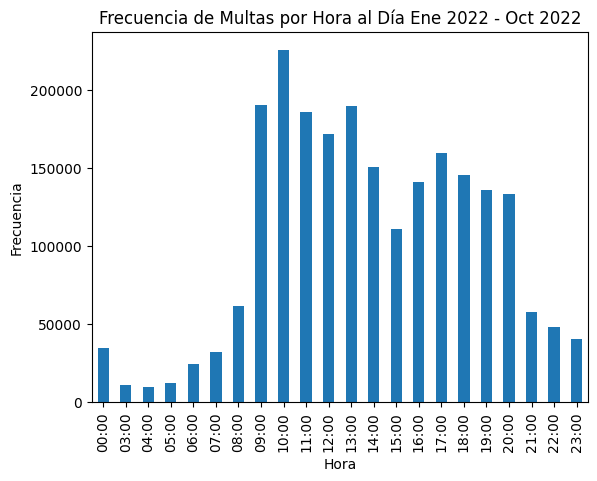

In [36]:
# We have already counted the frequency and stored it in the variable freq
# We do a sort and order the values

freq = freq.sort_index()

# create a bar chart of the frequency distribution
freq.plot(kind='bar')

# add axis labels and title
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Multas por Hora al Día Ene 2022 - Oct 2022')
plt.show()

# 9 -> Graphically show the fines made during the months of 2022. It is true that in the city of Madrid there is much less traffic during the summer months between the middle of June, July, August and a small part of September. Is this statement observed in the visualizations?

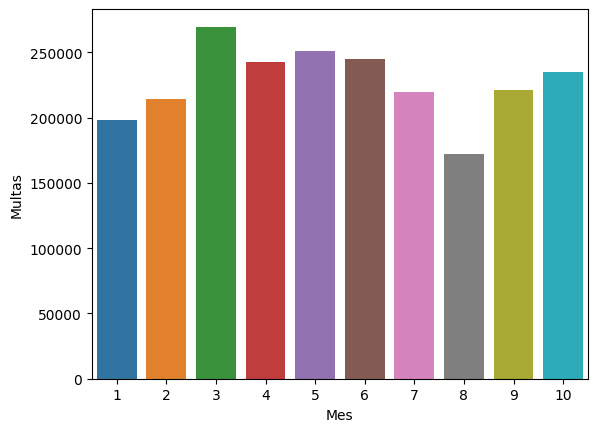

In [37]:
meses = dfm['MES'].value_counts().sort_index()

sns.barplot(x=meses.index, y=meses.values)
plt.xlabel('Mes')
plt.ylabel('Multas')
plt.show()


The only statement we can confidently make given this data is that August is the month with the fewest fines.
However, we can go a little deeper.
One option is to do a regression analysis to estimate the statistical significance of the variables, in this case the month, but it would not make much sense given that we do not have data on dates, work data on people in Madrid, data on where or how they travel (plane, train, car, etc.), or how long they are out of Madrid. During Easter in April we know that many people travel by car in Spain, it may be the reason why there are more fines and heavy traffic when leaving and returning to Madrid. On the other hand, in August many people are out of the city for the whole month although, as in April, some will go to the beach by car. There is nothing conclusive here.
In cases like this, the answer is usually the simplest. It can be seen that as August approaches, the number of infractions gradually decreases. So, we pull descriptive statistics to identify if there is a trend, which can be explored with more data in another study.
We averaged the fines for the summer months (June, July, August, and September 25% = +- 7.5 random days in this dataset represented as close to the "summer" part as possible since no dates) and compared it to both the Spring average (March, April, May) as the general average (we do not have data for November/December yet in order to make winter/autumn). To obtain confidence intervals and go deeper, it will be necessary to assume a type of distribution. In our case, it is not very useful with the little amount of data we have (n=10, 10 values of # of fines per month).

In [38]:
meses

1     197805
2     213907
3     269611
4     242415
5     250700
6     244934
7     219819
8     172264
9     221503
10    234922
Name: MES, dtype: int64

In [39]:
# Total fines/month mean

arr_m = np.array(meses)
mean_meses = np.mean(arr_m)

# Standard Deviation

stdev = arr_m.std()

# Spring mean fines/month (March, April, May)

pvera = (sum(arr_m[2:5]) / 3).round(2)

# Summer mean fines/month

verano = ((sum(arr_m[5:8]) + (arr_m[8]*0.25)) / 3.25).round(2)

# Spring mean distance from total mean

p_dist = ((pvera-mean_meses)/stdev).round(2)

# Summer mean distance from total mean

v_dist = ((verano-mean_meses)/stdev).round(2)

print(f"The mean of fines/month from Jan to Oct 2022 is: {mean_meses}.")
print(f"The mean of fines/month of Spring 2022 is: {pvera}.")
print(f"The mean of fines/month of Summer 2022 is: {verano}.")
print(f"Spring mean distance from total mean is: {p_dist} standard deviations.")
print(f"Summer mean distance from total mean is: {v_dist} standard deviations.")
print("A tendency can be affirmed but we would need the data of previous years for it to be conclusive.")

The mean of fines/month from Jan to Oct 2022 is: 226788.0.
The mean of fines/month of Spring 2022 is: 254242.0.
The mean of fines/month of Summer 2022 is: 213043.92.
Spring mean distance from total mean is: 1.03 standard deviations.
Summer mean distance from total mean is: -0.52 standard deviations.
A tendency can be affirmed but we would need the data of previous years for it to be conclusive.


# 10 -> Show the number of infractions graphically (without cumulative frequency), of each one of the public agents based on the seriousness of the infraction.

In [40]:
agrup_df = dfm.groupby(['DENUNCIANTE', 'CALIFICACION']).size().reset_index(name='INFRACCIONES')

In [41]:
agrup_df

,DENUNCIANTE,CALIFICACION,INFRACCIONES
0,AGENTES DE MOVILIDAD,GRAVE,711413
1,AGENTES DE MOVILIDAD,LEVE,197391
2,AGENTES DE MOVILIDAD,MUY GRAVE,123
3,POLICIA MUNICIPAL,GRAVE,379817
4,POLICIA MUNICIPAL,LEVE,108258
5,POLICIA MUNICIPAL,MUY GRAVE,8107
6,SACE,GRAVE,12272
7,SACE,LEVE,3137
8,SER,GRAVE,27416
9,SER,LEVE,819946


(array([0, 1, 2, 3]),
 [Text(0, 0, 'AGENTES DE MOVILIDAD'),
  Text(1, 0, 'POLICIA MUNICIPAL'),
  Text(2, 0, 'SACE'),
  Text(3, 0, 'SER')])

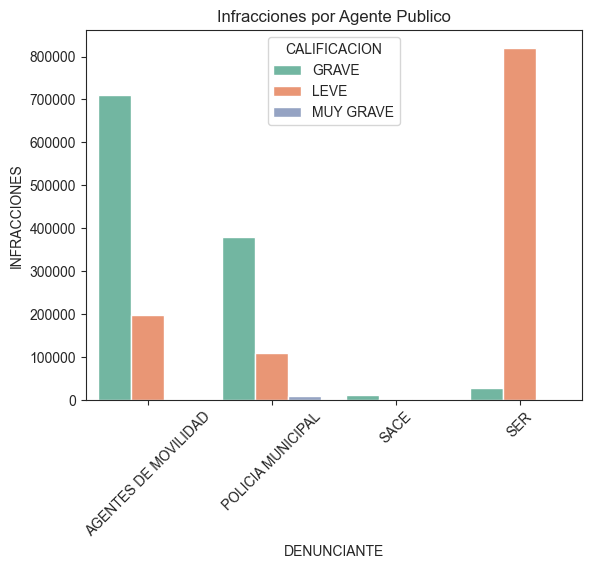

In [42]:
sns.set_style('ticks')
sns.set_palette('Set2')
sns.barplot(x='DENUNCIANTE', y='INFRACCIONES', hue='CALIFICACION', data=agrup_df, palette='Set2')
plt.legend(title='CALIFICACION')

plt.xlabel('DENUNCIANTE')
plt.ylabel('INFRACCIONES')
plt.title('Infracciones por Agente Publico')
plt.xticks(rotation=45) # adjust angle of titles for readability